In [ ]:
India Population map

In [ ]:
!pip install geopandas pandas matplotlib

Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  1
Enter the cumulative population to eliminate (in millions, e.g., 600):  5000



Directions available:
north-south , south-north, west-east, east-west


Enter cut direction:  north-south


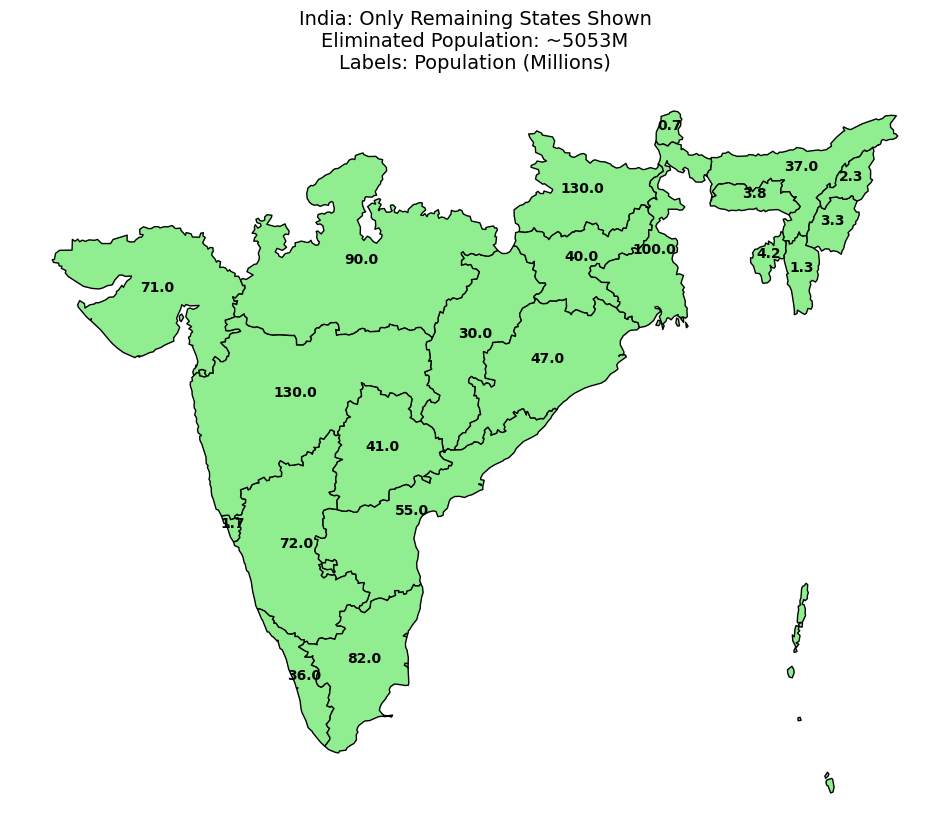

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions)", fontsize=14)
plt.axis("off")
plt.show()


Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  1
Enter the cumulative population to eliminate (in millions, e.g., 600):  5000



Directions available:
north-south , south-north, west-east, east-west


Enter cut direction:  south-north


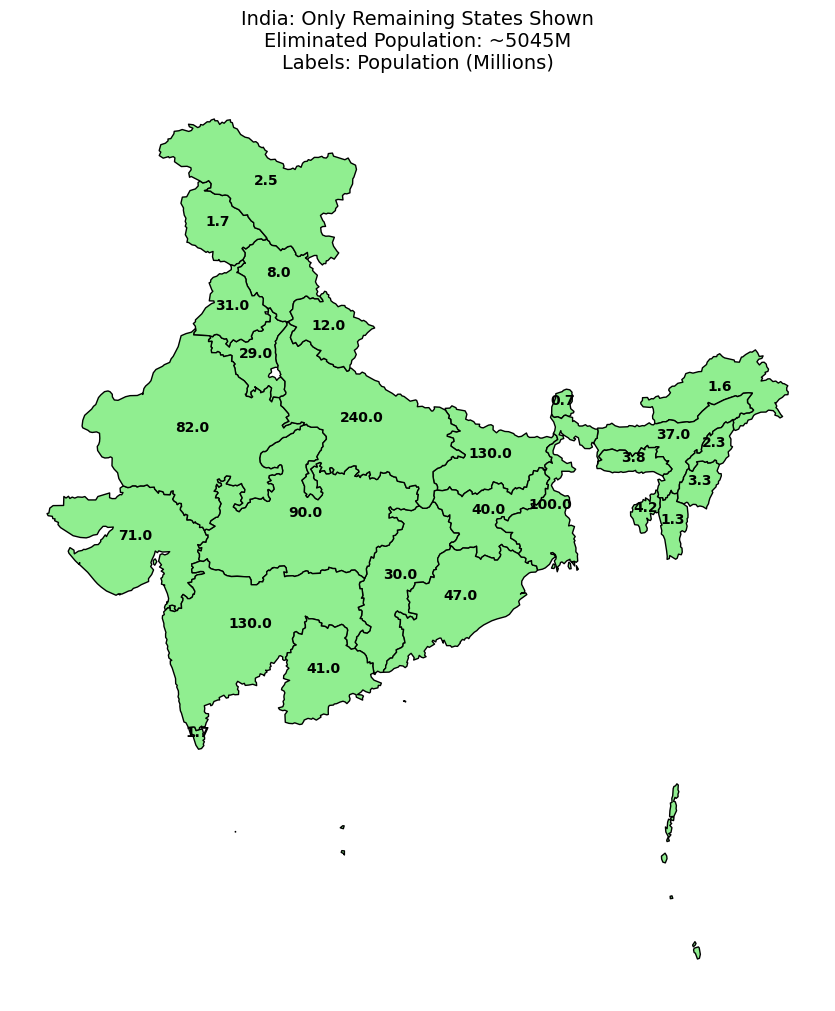

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions)", fontsize=14)
plt.axis("off")
plt.show()


Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  1
Enter the cumulative population to eliminate (in millions, e.g., 600):  5000



Directions available:
north-south , south-north, west-east, east-west


Enter cut direction:  west-east


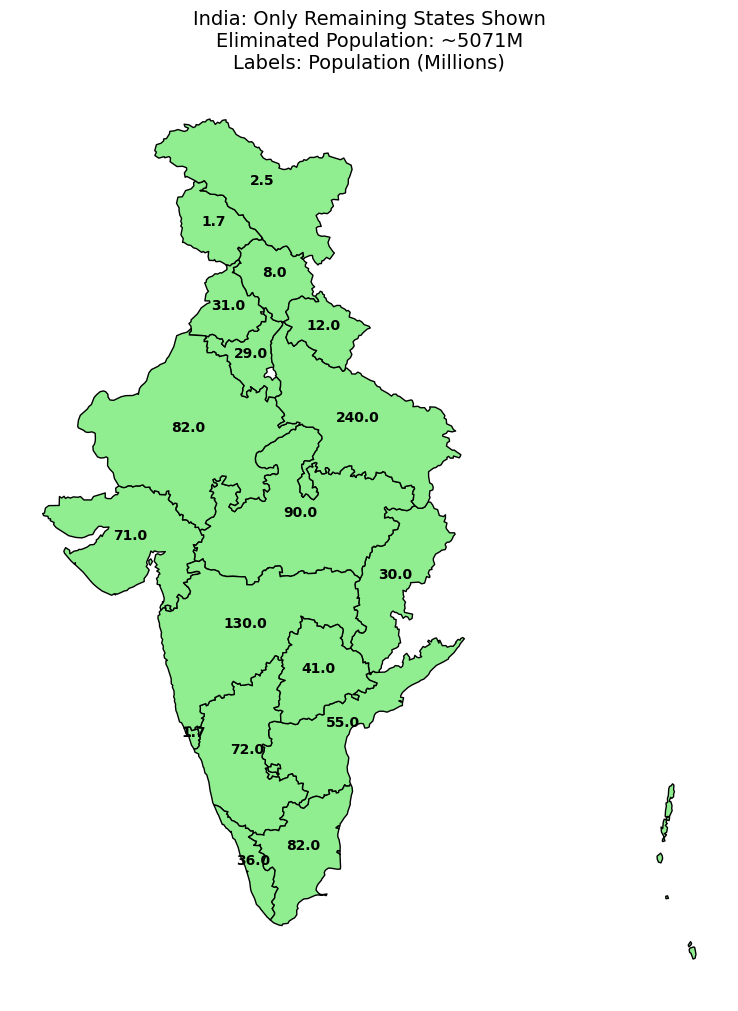

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions)", fontsize=14)
plt.axis("off")
plt.show()


Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  1
Enter the cumulative population to eliminate (in millions, e.g., 600):  5000



Directions available:
north-south , south-north, west-east, east-west


Enter cut direction:  east-west


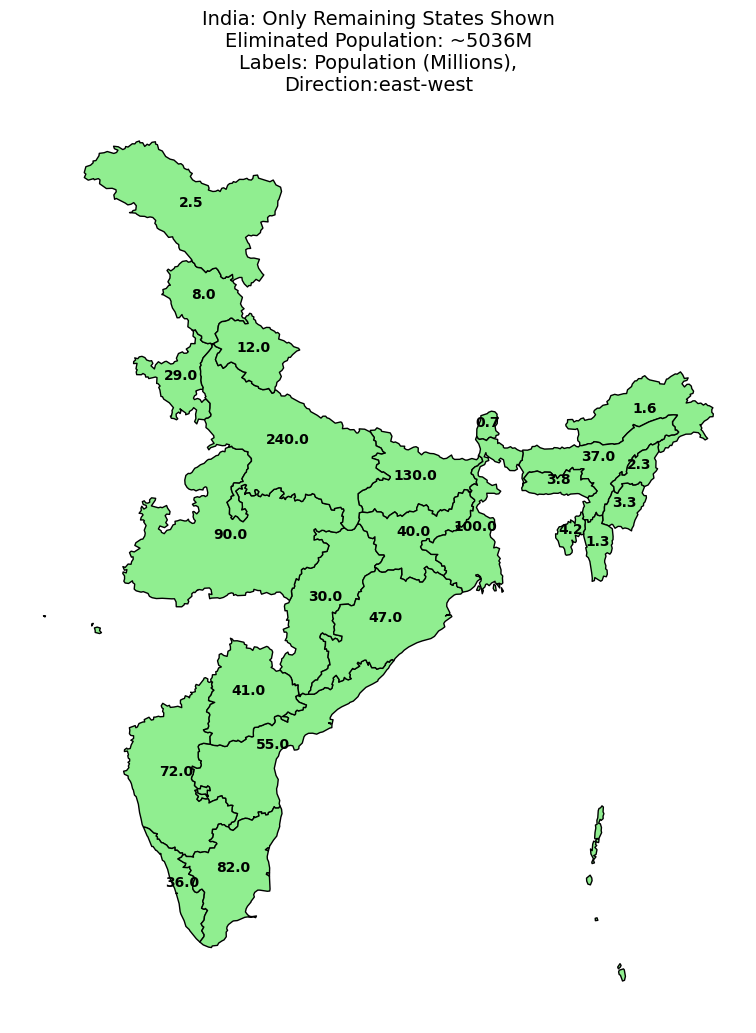

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions),\nDirection:{cut_direction}", fontsize=14)
plt.axis("off")
plt.show()


Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  2



Available states:
Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Chhattisgarh, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Karnataka, Kerala, Ladakh, Madhya Pradesh, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Punjab, Rajasthan, Sikkim, Tamil Nadu, Telangana, Tripura, Uttar Pradesh, Uttarakhand, West Bengal



Enter state names to eliminate (comma-separated):  Andhra Pradesh


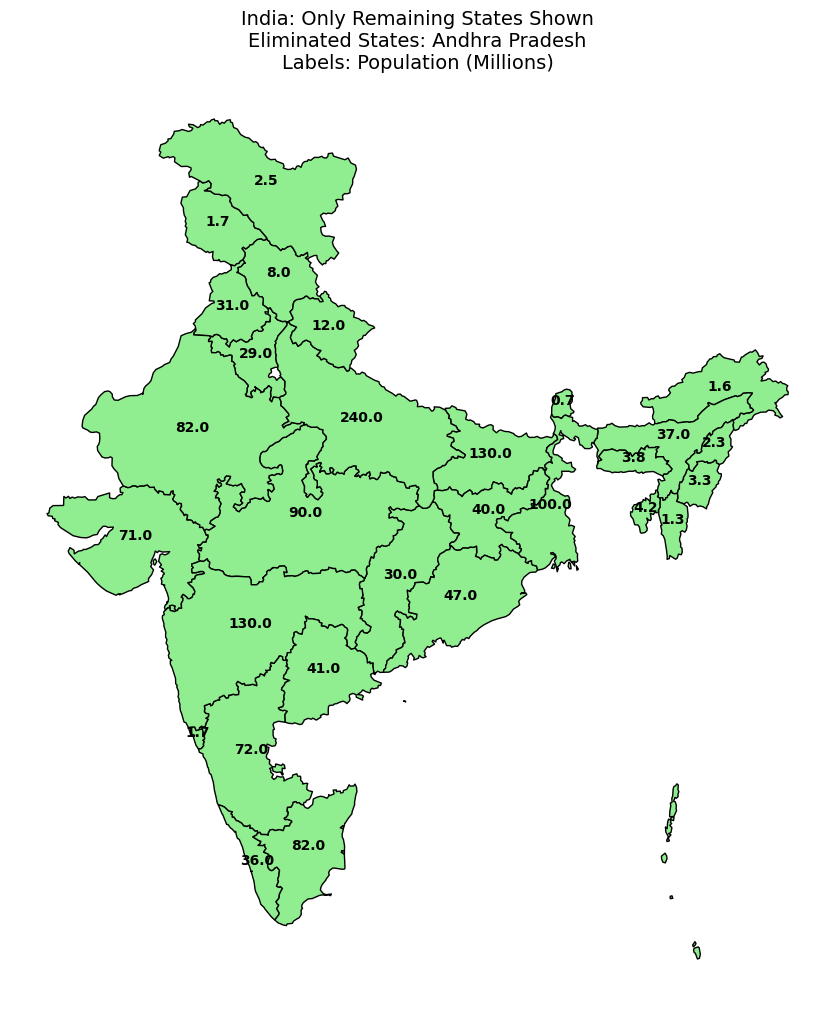

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions)", fontsize=14)
plt.axis("off")
plt.show()


Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  2



Available states:
Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Chhattisgarh, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Karnataka, Kerala, Ladakh, Madhya Pradesh, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Punjab, Rajasthan, Sikkim, Tamil Nadu, Telangana, Tripura, Uttar Pradesh, Uttarakhand, West Bengal



Enter state names to eliminate (comma-separated):  Andhra Pradesh,Tamil Nadu


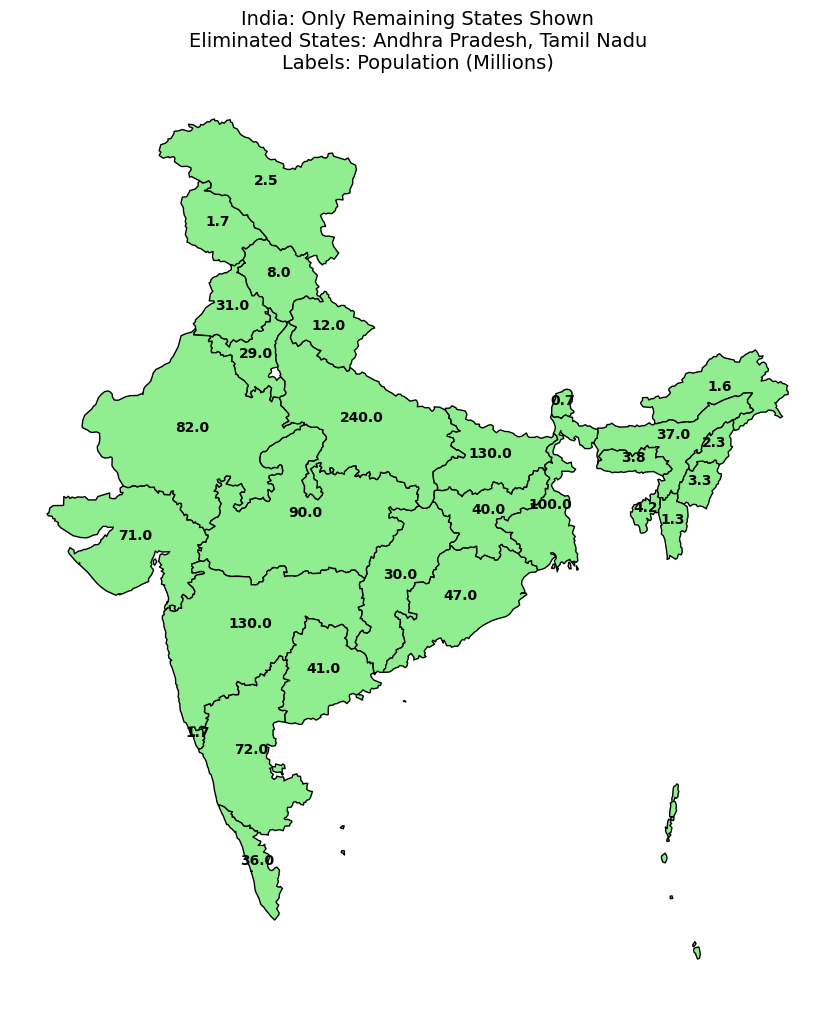

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions)", fontsize=14)
plt.axis("off")
plt.show()


Choose elimination method:
1. Eliminate by cumulative population and direction
2. Eliminate by specifying state names


Enter 1 or 2:  2



Available states:
Andhra Pradesh, Arunachal Pradesh, Assam, Bihar, Chhattisgarh, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu and Kashmir, Jharkhand, Karnataka, Kerala, Ladakh, Madhya Pradesh, Maharashtra, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Punjab, Rajasthan, Sikkim, Tamil Nadu, Telangana, Tripura, Uttar Pradesh, Uttarakhand, West Bengal



Enter state names to eliminate (comma-separated):  Andhra Pradesh,Kerala, Tamil Nadu


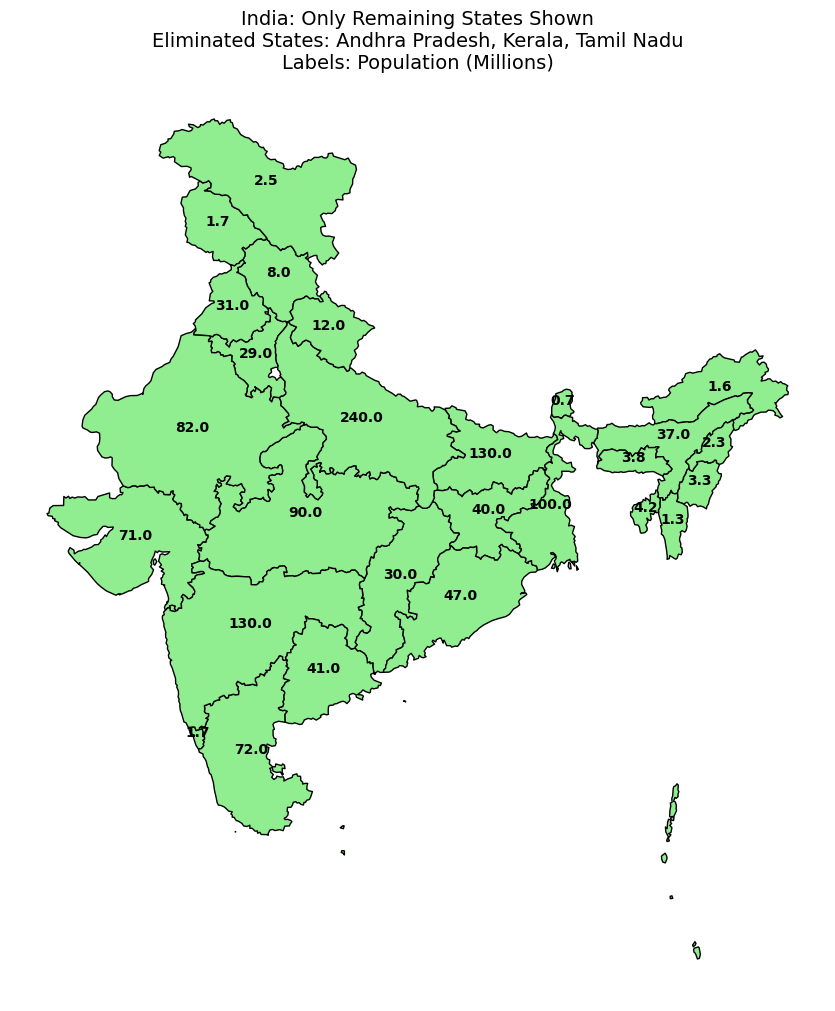

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- Sample state-wise population data (in millions) ---
state_populations = {
    "Uttar Pradesh": 240, "Maharashtra": 130, "Bihar": 130,
    "West Bengal": 100, "Madhya Pradesh": 90, "Tamil Nadu": 82,
    "Rajasthan": 82, "Karnataka": 72, "Gujarat": 71,
    "Andhra Pradesh": 55, "Odisha": 47, "Telangana": 41,
    "Jharkhand": 40, "Kerala": 36, "Assam": 37,
    "Punjab": 31, "Chhattisgarh": 30, "Haryana": 29,
    "Uttarakhand": 12, "Himachal Pradesh": 8, "Tripura": 4.2,
    "Meghalaya": 3.8, "Manipur": 3.3, "Nagaland": 2.3,
    "Goa": 1.7, "Arunachal Pradesh": 1.6, "Mizoram": 1.3,
    "Sikkim": 0.7,"Jammu and Kashmir":1.7,"Ladakh":2.5,
    
}

# --- Load India map ---
india_map = gpd.read_file("C:/Users/Lenovo/Data an/Map/india.geojson")

# --- Fix common name mismatches ---
name_corrections = {
    "Orissa": "Odisha", "Uttaranchal": "Uttarakhand",
    "Dadra & Nagar Haveli": None, "Daman & Diu": None,
    "Andaman & Nicobar Island":None,"Delhi":None,"Pondicherry":None,
    "Lakshadweep":None,"Chandigarh":None,
}
india_map["st_nm"] = india_map["st_nm"].replace(name_corrections)

# --- Merge population ---
pop_df = pd.DataFrame(list(state_populations.items()), columns=["st_nm", "population"])
india_map = india_map.merge(pop_df, on="st_nm", how="left")

# --- Project to a planar CRS for centroid calculation ---
india_map_proj = india_map.to_crs(epsg=3857)

# --- Compute centroids for sorting ---
india_map_proj["centroid"] = india_map_proj.geometry.centroid
india_map_proj["lat"] = india_map_proj["centroid"].y
india_map_proj["lon"] = india_map_proj["centroid"].x

# --- User chooses elimination method ---
print("Choose elimination method:")
print("1. Eliminate by cumulative population and direction")
print("2. Eliminate by specifying state names")
method = input("Enter 1 or 2: ").strip()

if method == "1":
    # --- Collect user input for population cut ---
    while True:
        try:
            cut_population = int(input("Enter the cumulative population to eliminate (in millions, e.g., 600): "))
            break
        except ValueError:
            print("Please enter a valid integer.")

    # --- Collect direction ---
    directions = [
        "north-south", "south-north",
        "west-east", "east-west"
    ]
    while True:
        print("\nDirections available:")
        print("north-south , south-north, west-east, east-west")
        cut_direction = input("Enter cut direction: ").strip().lower()
        if cut_direction in directions:
            break
        else:
            print("Please enter a valid direction from the list above.")

    # --- Determine sorting axis and order ---
    if cut_direction in ["north-south", "south-north"]:
        sort_col = "lat"
        ascending = (cut_direction == "south-north")
    else:
        sort_col = "lon"
        ascending = (cut_direction == "east-west")  # east-to-west: high to low

    # --- Sort and cut states by cumulative population ---
    sorted_map = india_map_proj.sort_values(by=sort_col, ascending=ascending)
    selected_states, total = [], 0
    for _, row in sorted_map.iterrows():
        if pd.isna(row["population"]): continue
        selected_states.append(row["st_nm"])
        total += row["population"]
        if total >= cut_population:
            break

    eliminated_states = selected_states
    eliminated_label = f"Eliminated Population: ~{int(total)}M"
else:
    # --- Collect user input for state names to eliminate ---
    print("\nAvailable states:")
    print(", ".join(sorted(state_populations.keys())))
    eliminated_states = input("\nEnter state names to eliminate (comma-separated): ").split(",")
    eliminated_states = [s.strip() for s in eliminated_states if s.strip() in state_populations]
    eliminated_label = f"Eliminated States: {', '.join(eliminated_states)}"

# --- Only plot remaining states ---
remaining_map = india_map_proj[~india_map_proj["st_nm"].isin(eliminated_states)].copy()

# --- Dissolve by state name to ensure one geometry per state ---
remaining_map_dissolved = remaining_map.dissolve(by="st_nm", as_index=False)

# --- Compute centroid for each state for labeling ---
remaining_map_dissolved["centroid"] = remaining_map_dissolved.geometry.centroid
remaining_map_dissolved["lon"] = remaining_map_dissolved["centroid"].x
remaining_map_dissolved["lat"] = remaining_map_dissolved["centroid"].y

# --- Plot only the remaining states with population number labels once per state ---
fig, ax = plt.subplots(figsize=(12, 12))
remaining_map_dissolved.plot(ax=ax, color="lightgreen", edgecolor="black")

# Label each state once at its centroid with its population only
for idx, row in remaining_map_dissolved.iterrows():
    pop = row['population']
    if pd.notnull(pop):
        ax.annotate(
            f"{pop}",
            (row['lon'], row['lat']),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.title(f"India: Only Remaining States Shown\n{eliminated_label}\nLabels: Population (Millions)", fontsize=14)
plt.axis("off")
plt.show()
